In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
import warnings
warnings.filterwarnings('ignore')

In [208]:
df = pd.read_csv('./Data/laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [209]:
df['brand'].value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

In [210]:
df['processor_brand'].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [211]:
df['processor_gnrtn'].value_counts()

processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [213]:
df['ram_gb'].value_counts()

ram_gb
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64

In [214]:
df['ram_type'].value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [215]:
df['ssd'].value_counts() ,  df['hdd'].value_counts()

(ssd
 512 GB     398
 256 GB     184
 0 GB       124
 1024 GB    111
 128 GB       3
 2048 GB      2
 3072 GB      1
 Name: count, dtype: int64,
 hdd
 0 GB       621
 1024 GB    160
 512 GB      41
 2048 GB      1
 Name: count, dtype: int64)

In [216]:
df['Price'].agg(min = 'min', max = 'max', average = 'mean')

min         16990.0000
max        441990.0000
average     76745.1774
Name: Price, dtype: float64

In [217]:
df[(df['Price']==df['Price'].min())]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
194,Lenovo,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,16990,3 stars,414,54


In [218]:
df[(df['Price']==df['Price'].max())]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
594,ASUS,Intel,Core i9,11th,16 GB,DDR4,3072 GB,0 GB,Windows,32-bit,6 GB,Casual,1 year,No,No,441990,5 stars,1,1


Text(0, 0.5, 'Price')

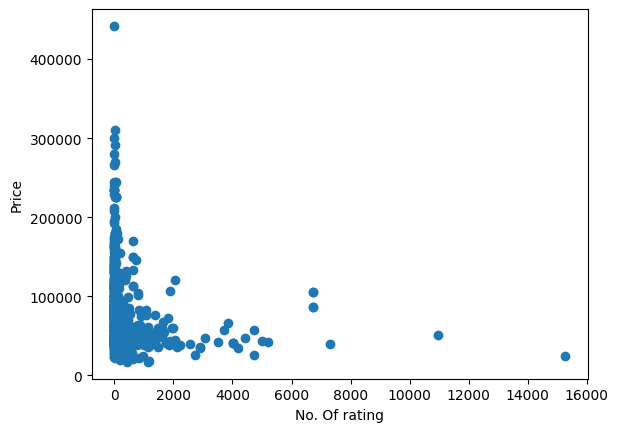

In [219]:
plt.scatter(df['Number of Ratings'],df['Price'])
plt.xlabel('No. Of rating')
plt.ylabel('Price')

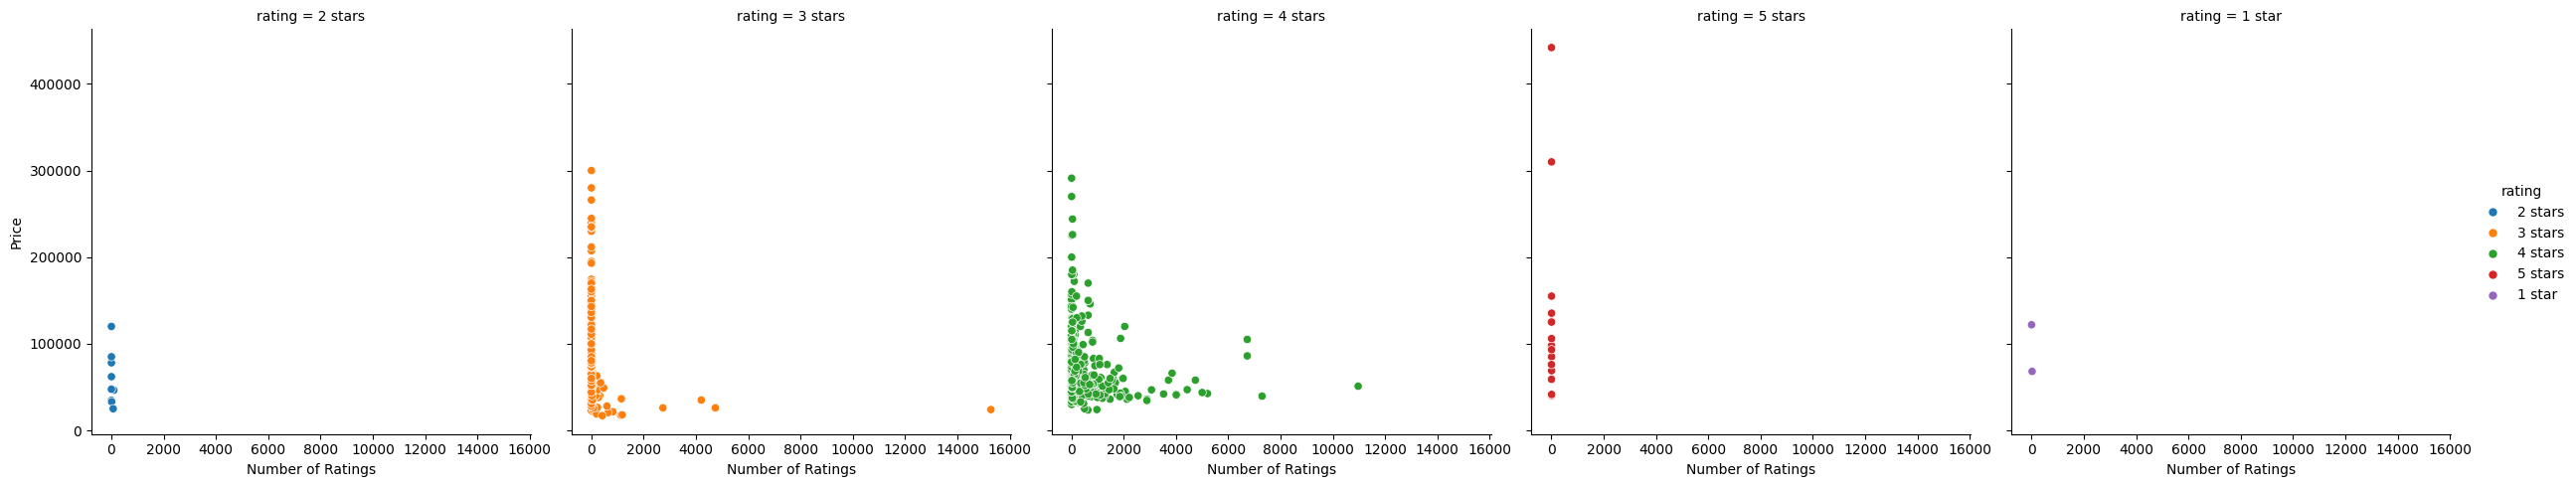

In [220]:
sns.relplot(x=df['Number of Ratings'],y=df['Price'],data=df,hue='rating',col='rating')

In [221]:
df['ssd'].value_counts()

ssd
512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

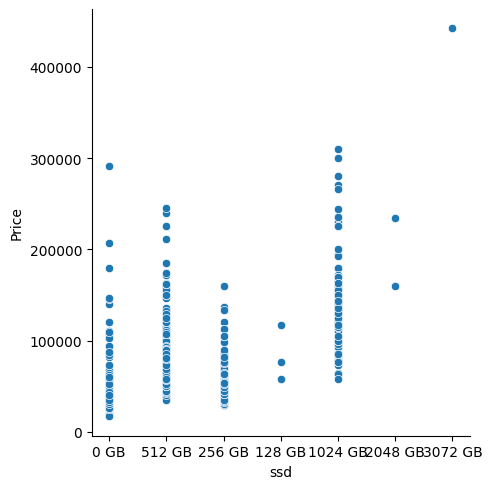

In [222]:
sns.relplot(x='ssd',y='Price',data=df)

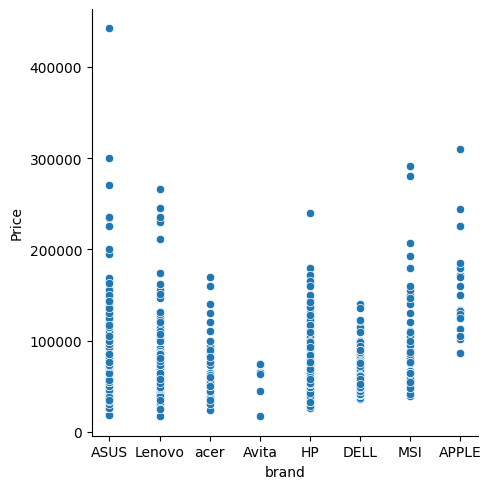

In [223]:
sns.relplot(x='brand',y='Price',data=df)

In [224]:
df['rating'].value_counts()

rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [225]:
df['warranty'].value_counts()

warranty
1 year         509
No warranty    278
2 years         23
3 years         13
Name: count, dtype: int64

In [226]:
dt = {'1 year':1, "No warranty":0, '2 years':2, '3 years':3}

In [227]:
df['warranty'] = df['warranty'].map(dt)

In [228]:
df['rating'].value_counts()

rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [229]:
df['rating'].value_counts().keys().sort_values()


Index(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], dtype='object', name='rating')

In [230]:
dt2 = {}
for i in range(len(df['rating'].value_counts())):
    dt2[df['rating'].value_counts().keys().sort_values()[i]] = i+1

dt2

{'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}

In [231]:
df['rating'] = df['rating'].map(dt2)

In [232]:
df['graphic_card_gb'].value_counts()

graphic_card_gb
0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

In [233]:
for index,item in enumerate(df['graphic_card_gb']):
    df['graphic_card_gb'][index]=item[0]

In [234]:
for index,item in enumerate(df['os_bit']):
    df['os_bit'][index]=item[0:2]

In [235]:
dt = {'0':0, '4':4, '2':2, '6':6, '8':8, '64':64, '32':32}

In [236]:
df['os_bit'] = df['os_bit'].map(dt)
df['graphic_card_gb'] = df['graphic_card_gb'].map(dt)


In [237]:
df['ram_gb'].value_counts()

ram_gb
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64

In [238]:
dt2 = {'4 GB':4, '8 GB':8, '16 GB':16, '32 GB':32}

In [239]:
df['ram_gb'] = df['ram_gb'].map(dt2)

In [240]:
df['hdd'].value_counts()

hdd
0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: count, dtype: int64

In [241]:
df['ssd'].value_counts()

ssd
512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

In [242]:
dt = {'0 GB':0,'128 GB':128, '256 GB':256, '512 GB':512, '1024 GB':1024, '2048 GB':2048, '3072 GB':3072}

In [243]:
df['hdd'] = df['hdd'].map(dt)
df['ssd'] = df['ssd'].map(dt)

In [244]:
df['processor_gnrtn'].value_counts().keys()

Index(['11th', 'Not Available', '10th', '8th', '7th', '9th', '12th', '4th'], dtype='object', name='processor_gnrtn')

In [245]:
dt = {'11th':11, 'Not Available':0, '10th':10, '8th':8, '7th':7, '9th':9, '12th':12, '4th':4}
df['processor_gnrtn'] = df['processor_gnrtn'].map(dt)

In [246]:
df2 = df.drop('brand',axis=1)

In [247]:
df2['processor_name'].value_counts().values.sum()

np.int64(823)

In [248]:
dt = {'Celeron Dual':0, 'Pentium Quad':1, 'Ryzen 3':2, 'Core i3':3, 'Ryzen 5':4, 'Core i5':5, 'Ryzen 7':6, 'Core i7':7, 'M1':8, 'Ryzen 9':9, 'Core i9':10}
df2['processor_name'] = df2['processor_name'].map(dt)

In [254]:
df2 = pd.get_dummies(df2,drop_first='if_binary').astype('int')

In [255]:
df2.columns

Index(['processor_name', 'processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'os_bit',
       'graphic_card_gb', 'warranty', 'Price', 'rating', 'Number of Ratings',
       'Number of Reviews', 'processor_brand_Intel', 'processor_brand_M1',
       'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
       'ram_type_LPDDR4X', 'os_Mac', 'os_Windows', 'weight_Gaming',
       'weight_ThinNlight', 'Touchscreen_Yes', 'msoffice_Yes'],
      dtype='object')

In [258]:
df2.duplicated().sum()

np.int64(22)

In [259]:
df2.drop_duplicates(inplace=True)

In [260]:
df2.head()

,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,Price,rating,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,Touchscreen_Yes,msoffice_Yes
0,3,10,4,0,1024,64,0,0,34649,2,...,0,0,0,0,0,1,0,0,0,0
1,3,10,4,0,1024,64,0,0,38999,3,...,0,0,0,0,0,1,0,0,0,0
2,3,10,4,0,1024,64,0,0,39999,3,...,0,0,0,0,0,1,0,0,0,0
3,5,10,8,512,0,32,2,0,69990,3,...,0,0,0,0,0,1,0,0,0,0
4,0,0,4,0,512,64,0,0,26990,3,...,0,0,0,0,0,1,0,0,0,0


In [261]:
x = df2.drop('Price',axis='columns')
y = df2['Price']

In [262]:
x.head()

,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,rating,Number of Ratings,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,Touchscreen_Yes,msoffice_Yes
0,3,10,4,0,1024,64,0,0,2,3,...,0,0,0,0,0,1,0,0,0,0
1,3,10,4,0,1024,64,0,0,3,65,...,0,0,0,0,0,1,0,0,0,0
2,3,10,4,0,1024,64,0,0,3,8,...,0,0,0,0,0,1,0,0,0,0
3,5,10,8,512,0,32,2,0,3,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,4,0,512,64,0,0,3,0,...,0,0,0,0,0,1,0,0,0,0


In [263]:
y.head()

0    34649
1    38999
2    39999
3    69990
4    26990
Name: Price, dtype: int64

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [272]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((680, 24), (121, 24), (680,), (121,))

In [273]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [274]:
lnr = LinearRegression()
lgr = LogisticRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [279]:
lnr.fit(x_train,y_train)

lgr.fit(x_train,y_train)

dtr.fit(x_train,y_train)

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [280]:
print(lnr.score(x_train,y_train))
print(lnr.score(x_test,y_test))
print('')

print(lgr.score(x_train,y_train))
print(lgr.score(x_test,y_test))
print('')

print(dtr.score(x_train,y_train))
print(dtr.score(x_test,y_test))
print('')

print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))




0.7706575562336784
0.6823640510057267

0.051470588235294115
0.024793388429752067

0.9964435603459864
0.6906885918220547

0.9629748343720703
0.7890260550162624


In [289]:
predict = pd.DataFrame({})

In [290]:
predict['Actual Value'] = y_test

In [291]:
predict['Prediction']=rfr.predict(x_test)

In [292]:
predict.head()

,Actual Value,Prediction
681,69990,69935.810
513,162990,124557.055
249,70090,60842.620
705,91990,97555.980
541,124990,131605.750


In [293]:
import os
import joblib

In [294]:
os.makedirs('Prediction',exist_ok=True)

In [303]:
os.makedirs('Models',exist_ok=True)

In [305]:
joblib.dump(rfr,'./Models/RandomForestRegrression.lb')

['./Models/RandomForestRegrression.lb']

In [307]:
predict.to_csv('./Prediction/Predict_values',index=False)